In [218]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [219]:
fileprefix = "full_2" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [220]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [221]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 60f99eebe697a698c80fcb03
2 615dd36156bf443246c0b660
3 6166a03f5063db088c458b73
4 60d845cb9b3d8e4911853cd9
5 615b3fcbe06552b583481a65
6 615b1a72665ee9e08ccab86e
7 debugDhM30
8 5d55a0f63af827001981b8d6
9 611e4aad7f8f811ba1871763
10 611a877bcd96a7f29f70230a
11 6112aa865f237cf99d0b0094
12 56f81ffe1b99b8000636b9c8
13 61277e00d79f75c1e0ef6533
14 61505b249d64b1a011c4ca4d
15 61644a9055a7fdced6a7aa9c
16 606eeec7742566e9d46a52c8
Fail
17 61656a7e58d53cbb92ade865
18 5fc4c49da0603a4d5feae548
19 6133c695f3c1469136aad4ce
20 60f724fd8ec131e82a00b129
21 5e0df69e6f6d3e5342ba6d24
22 63ed4941a5e7b8fc0957676f
23 62e2917bb46ebde5c7866071
24 5e4e6e53f4bdd82b601f2e9a
25 60cfcb4c402bc3a7ff5d8f3d
26 6167c924c05acec22cac6c8d
27 5b52fb6cb3c9400001f23bb5
28 64803fe717b0a137be421ae1
29 6153703d974b2bf60bccf6e2
30 60db9c9850c39eea109ef1d3
31 6139d8c791c9b4805690b33e
32 60be90f1912d5331e734e92c
33 611d390459ab8999d8742c44
34 5be9784e18a71d0001317761
35 631a1dc31cb107f36694e744
36 615a2c11b1a80d0b33a58bf9
37 60a5773

In [222]:
part_data.keys()


dict_keys(['60f99eebe697a698c80fcb03', '615dd36156bf443246c0b660', '6166a03f5063db088c458b73', '60d845cb9b3d8e4911853cd9', '615b3fcbe06552b583481a65', '615b1a72665ee9e08ccab86e', '5d55a0f63af827001981b8d6', '611e4aad7f8f811ba1871763', '611a877bcd96a7f29f70230a', '6112aa865f237cf99d0b0094', '56f81ffe1b99b8000636b9c8', '61277e00d79f75c1e0ef6533', '61505b249d64b1a011c4ca4d', '61644a9055a7fdced6a7aa9c', '61656a7e58d53cbb92ade865', '5fc4c49da0603a4d5feae548', '6133c695f3c1469136aad4ce', '60f724fd8ec131e82a00b129', '5e0df69e6f6d3e5342ba6d24', '63ed4941a5e7b8fc0957676f', '62e2917bb46ebde5c7866071', '5e4e6e53f4bdd82b601f2e9a', '60cfcb4c402bc3a7ff5d8f3d', '6167c924c05acec22cac6c8d', '5b52fb6cb3c9400001f23bb5', '64803fe717b0a137be421ae1', '6153703d974b2bf60bccf6e2', '60db9c9850c39eea109ef1d3', '6139d8c791c9b4805690b33e', '60be90f1912d5331e734e92c', '611d390459ab8999d8742c44', '5be9784e18a71d0001317761', '631a1dc31cb107f36694e744', '615a2c11b1a80d0b33a58bf9', '60a5773de3845b5c5dc04882', '60fedd72

In [223]:
len(part_data.keys())

62

# Reading Data from Already Created Participant Data Files

In [6]:
fileprefix = "pilot_3" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [7]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [223]:
len(part_data.keys())

62

# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [224]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    clicksL1 = []
    firstLevelAns = {}
    clickStratsValid = True
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']

        if trial_id.startswith("self_report_2"):
            firstLevelAns = trial['trialdata']['response']
        
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
            
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
                clicks = trial['trialdata']['queries']['click']['state']['target']
                cL1 = len([c for c in clicks if int(c) in [1,12,23]])
                clicksL1.append(cL1)
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial
    
    # Checking if click strategies are invalid
    if firstLevelAns:
        # Criteria 1: clicks made on first level nodes on more than 10% of the trials
        madeL1Clicks = sum([bool(c) for c in clicksL1])/len(clicksL1) >= 0.10
        # Criteria 2: did not pay attention to the values at the first level - average agreement with
        #   negative statements greater than 2 (indifference)
        
        # Assessed by answers to Q5 and Q6
        possible_answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
        
        # "... I did pay attention"
        scoreQ5 = possible_answers.index(firstLevelAns["Q5"])
        # "... I did NOT pay attention"
        scoreQ6 = possible_answers.index(firstLevelAns["Q6"])
        adj_scoreQ6 = len(possible_answers) - scoreQ6 - 1
        
        avg_attn_score = (scoreQ5 + adj_scoreQ6) / 2
        clickStratsValid = not madeL1Clicks or (avg_attn_score >= 2)
    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "clicksL1": clicksL1,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "firstLevelAns": firstLevelAns,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses,
        "clickStratsValid": clickStratsValid
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

60f99eebe697a698c80fcb03
60f99eebe697a698c80fcb03 mdp
615dd36156bf443246c0b660
6166a03f5063db088c458b73
60d845cb9b3d8e4911853cd9
No data
615b3fcbe06552b583481a65
615b1a72665ee9e08ccab86e
5d55a0f63af827001981b8d6
611e4aad7f8f811ba1871763
611a877bcd96a7f29f70230a
611a877bcd96a7f29f70230a mdp
6112aa865f237cf99d0b0094
56f81ffe1b99b8000636b9c8
61277e00d79f75c1e0ef6533
61505b249d64b1a011c4ca4d
61644a9055a7fdced6a7aa9c
61656a7e58d53cbb92ade865
5fc4c49da0603a4d5feae548
6133c695f3c1469136aad4ce
60f724fd8ec131e82a00b129
5e0df69e6f6d3e5342ba6d24
5e0df69e6f6d3e5342ba6d24 mdp
63ed4941a5e7b8fc0957676f
62e2917bb46ebde5c7866071
5e4e6e53f4bdd82b601f2e9a
5e4e6e53f4bdd82b601f2e9a mdp
60cfcb4c402bc3a7ff5d8f3d
6167c924c05acec22cac6c8d
5b52fb6cb3c9400001f23bb5
64803fe717b0a137be421ae1
6153703d974b2bf60bccf6e2
60db9c9850c39eea109ef1d3
60db9c9850c39eea109ef1d3 mdp
6139d8c791c9b4805690b33e
60be90f1912d5331e734e92c
60be90f1912d5331e734e92c mdp
611d390459ab8999d8742c44
5be9784e18a71d0001317761
631a1dc31cb107f366

In [225]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

60


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,60f99eebe697a698c80fcb03,2023-08-03 14:07:20.804639,1021.401,1021.401,0,2.0,0,547.449,0.00,0,mdp,False,6,-1,False
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,1231.000,1221.000,0,1.0,40,912.150,298.00,0,None,True,3,2,True
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2484.000,2473.000,1,1.0,40,1576.070,1560.45,0,None,True,3,0,True
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2441.000,1812.000,0,1.0,40,1183.328,2479.40,0,None,True,3,0,True
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2142.000,2110.000,1,1.0,40,1473.294,397.70,0,None,True,3,1,True
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,1633.000,1623.000,1,3.0,40,1385.124,-280.50,0,None,True,3,3,True
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2708.000,2693.000,0,1.0,40,2084.522,1258.40,0,None,True,3,0,True
7,611a877bcd96a7f29f70230a,2023-08-03 13:58:31.660146,519.966,519.966,1,0.5,0,102.000,0.00,0,mdp,False,2,-1,False
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2664.000,2624.000,0,1.0,40,1370.344,-429.00,0,None,True,3,1,True
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,1932.000,1924.000,1,1.0,40,1394.863,2157.65,0,None,True,3,0,True


In [226]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

2


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
36,615ad127d286180356188f84,2023-08-03 13:54:13.993456,NaT,2023-08-03 13:54:38.050669,6,chrome,windows,en-GB,98.598,98.598,...,,{},0,None,True,0.0,0.0,-98.598,NaN,NaN
40,60d65e8c766ade1e2fcd362b,2023-08-03 13:55:20.116841,NaT,2023-08-03 13:55:35.315398,6,chrome,linux,en-ZA,0.000,0.000,...,,{},0,None,True,0.0,0.0,0.000,NaN,NaN


In [227]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

58


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,60f99eebe697a698c80fcb03,2023-08-03 14:07:20.804639,NaT,2023-08-03 14:07:38.568243,6,chrome,windows,en-GB,1021.401,1021.401,...,,{},0,None,True,0.00,547.449,-473.952,NaN,NaN
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,No,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875000,0.0
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"It was not difficult at all, the only challeng...","{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125000,0.0
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,Pretty difficult because the rounds keep chang...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800000,0.0
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,Not wanting to spend money to look at the node...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425000,0.0
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,bit difficult,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400000,0.0
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,it was difficult because the amounts kept chan...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875000,0.0
7,611a877bcd96a7f29f70230a,2023-08-03 13:58:31.660146,NaT,2023-08-03 13:58:43.602691,2,chrome,windows,en-US,519.966,519.966,...,,{},0,None,True,0.00,102.000,-417.966,NaN,NaN
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,the its self was difficult to understand,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775000,0.0
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,2023-08-03 14:31:54.565888,2023-08-03 13:59:49.965349,3,chrome,macos,en-GB,1932.000,1924.000,...,Somewhat difficult; the highest-value nodes we...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",False,2157.65,1394.863,-529.137,29807.425000,0.0


In [228]:
# Partial compensation rates

gbp_hourly = 6.00
secondly_rate = gbp_hourly / (3600)

In [229]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']), row['condition'])
    
early_quitters

0


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus


In [230]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

9
60f99eebe697a698c80fcb03, 0.91
611a877bcd96a7f29f70230a, 0.17
60db9c9850c39eea109ef1d3, 0.24
60be90f1912d5331e734e92c, 0.31
60a5773de3845b5c5dc04882, 0.79
614da4dd46a046479740407a, 0.19
610d4b020c0ec927cbd29bb4, 3.22
614fb1dd07393b9789143d2b, 1.34
615b37de9f81596034aeb896, 0.30


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_59501/3569009787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
0,60f99eebe697a698c80fcb03,2023-08-03 14:07:20.804639,NaT,2023-08-03 14:07:38.568243,6,chrome,windows,en-GB,1021.401,1021.401,...,{},0,None,True,0.0,547.449,-473.952,NaN,NaN,0.912415
7,611a877bcd96a7f29f70230a,2023-08-03 13:58:31.660146,NaT,2023-08-03 13:58:43.602691,2,chrome,windows,en-US,519.966,519.966,...,{},0,None,True,0.0,102.000,-417.966,NaN,NaN,0.170000
26,60db9c9850c39eea109ef1d3,2023-08-03 13:57:55.282015,NaT,2023-08-03 13:58:13.501454,6,chrome,windows,en-GB,476.378,476.378,...,{},0,None,True,0.0,142.874,-333.504,NaN,NaN,0.238123
28,60be90f1912d5331e734e92c,2023-08-03 13:52:45.765322,NaT,2023-08-03 13:52:56.613869,6,safari,macos,en-us,931.726,931.726,...,{},0,None,True,0.0,183.795,-747.931,NaN,NaN,0.306325
33,60a5773de3845b5c5dc04882,2023-08-03 13:53:27.794768,NaT,2023-08-03 13:54:01.425694,2,chrome,windows,en-GB,764.344,764.344,...,{},0,None,True,0.0,471.709,-292.635,NaN,NaN,0.786182
35,614da4dd46a046479740407a,2023-08-03 13:52:57.430552,NaT,2023-08-03 13:53:12.670153,6,safari,macos,en-gb,154.736,154.736,...,{},0,None,True,0.0,113.999,-40.737,NaN,NaN,0.189998
46,610d4b020c0ec927cbd29bb4,2023-08-03 13:55:39.311699,2023-08-03 14:32:35.504928,2023-08-03 13:55:54.298393,3,chrome,windows,en-ZA,2216.000,2201.000,...,{},0,None,True,0.0,1932.287,-268.713,NaN,NaN,3.220478
50,614fb1dd07393b9789143d2b,2023-08-03 13:55:38.030171,2023-08-03 14:16:36.737915,2023-08-03 13:56:07.794217,3,chrome,windows,en-US,1258.000,1228.000,...,{},0,None,True,0.0,806.624,-421.376,NaN,NaN,1.344373
56,615b37de9f81596034aeb896,2023-08-03 13:55:13.566308,NaT,2023-08-03 13:57:28.902233,6,chrome,windows,en-GB,222.156,222.156,...,{},0,None,True,0.0,182.267,-39.889,NaN,NaN,0.303778


In [231]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
0,60f99eebe697a698c80fcb03,2.0,mdp,0
7,611a877bcd96a7f29f70230a,0.5,mdp,0
26,60db9c9850c39eea109ef1d3,1.0,mdp,0
28,60be90f1912d5331e734e92c,1.0,mdp,0
33,60a5773de3845b5c5dc04882,1.5,mdp,0
35,614da4dd46a046479740407a,1.0,mdp,0
46,610d4b020c0ec927cbd29bb4,4.0,mdp,0
50,614fb1dd07393b9789143d2b,4.0,mdp,0
56,615b37de9f81596034aeb896,1.0,mdp,0


In [232]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

60f99eebe697a698c80fcb03	0
611a877bcd96a7f29f70230a	1
60db9c9850c39eea109ef1d3	1
60be90f1912d5331e734e92c	0
60a5773de3845b5c5dc04882	1
614da4dd46a046479740407a	0
610d4b020c0ec927cbd29bb4	0
614fb1dd07393b9789143d2b	1
615b37de9f81596034aeb896	1


In [233]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

49


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,No,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875000,0.0
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"It was not difficult at all, the only challeng...","{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125000,0.0
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,Pretty difficult because the rounds keep chang...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800000,0.0
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,Not wanting to spend money to look at the node...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425000,0.0
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,bit difficult,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400000,0.0
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,it was difficult because the amounts kept chan...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875000,0.0
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,the its self was difficult to understand,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775000,0.0
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,2023-08-03 14:31:54.565888,2023-08-03 13:59:49.965349,3,chrome,macos,en-GB,1932.000,1924.000,...,Somewhat difficult; the highest-value nodes we...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",False,2157.65,1394.863,-529.137,29807.425000,0.0
10,61277e00d79f75c1e0ef6533,2023-08-03 15:15:47.314676,2023-08-03 16:28:41.463375,2023-08-03 15:17:32.570588,3,chrome,windows,en-US,4374.000,4268.000,...,I was not that difficult one I figured out tha...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1700.80,2472.850,-1795.150,48358.950000,0.0
11,61505b249d64b1a011c4ca4d,2023-08-03 13:54:36.288567,2023-08-03 14:23:14.324482,2023-08-03 13:55:02.163717,3,chrome,macos,en-US,1718.000,1692.000,...,it wasn't difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1294.60,1215.218,-476.782,23145.900000,0.0


In [236]:
data_actually_complete = ["64b43cb91f5786da4da01dab"]

In [237]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint", "demographicsAvailable"]]

2


,workerId,numTrialsCompleted,dropoutPoint,demographicsAvailable
17,5e0df69e6f6d3e5342ba6d24,32,mdp,False
20,5e4e6e53f4bdd82b601f2e9a,26,mdp,False


In [238]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5e0df69e6f6d3e5342ba6d24	0
5e4e6e53f4bdd82b601f2e9a	0


In [239]:

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = ["5e0df69e6f6d3e5342ba6d24", "5e4e6e53f4bdd82b601f2e9a"]


In [240]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))#, row['condition'])
incomplete_partial

2
5e0df69e6f6d3e5342ba6d24, 1.50
5e4e6e53f4bdd82b601f2e9a, 1.40


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_59501/550307939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
17,5e0df69e6f6d3e5342ba6d24,2023-08-03 13:55:26.086154,NaT,2023-08-03 13:55:32.003002,6,safari,macos,en-gb,1290.629,1290.629,...,{},0,None,True,1021.4,902.023,-388.606,19881.156250,0.0,1.503372
20,5e4e6e53f4bdd82b601f2e9a,2023-08-03 14:06:56.210932,NaT,2023-08-03 14:07:02.999193,6,safari,macos,en-GB,1022.983,1022.983,...,{},0,None,True,798.2,842.479,-180.504,17757.346154,0.0,1.404132


In [260]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
complete_data

24
23


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,No,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875,0.0
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"It was not difficult at all, the only challeng...","{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125,0.0
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,Pretty difficult because the rounds keep chang...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800,0.0
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,Not wanting to spend money to look at the node...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425,0.0
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,bit difficult,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400,0.0
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,it was difficult because the amounts kept chan...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875,0.0
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,the its self was difficult to understand,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775,0.0
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,2023-08-03 14:31:54.565888,2023-08-03 13:59:49.965349,3,chrome,macos,en-GB,1932.000,1924.000,...,Somewhat difficult; the highest-value nodes we...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",False,2157.65,1394.863,-529.137,29807.425,0.0
10,61277e00d79f75c1e0ef6533,2023-08-03 15:15:47.314676,2023-08-03 16:28:41.463375,2023-08-03 15:17:32.570588,3,chrome,windows,en-US,4374.000,4268.000,...,I was not that difficult one I figured out tha...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1700.80,2472.850,-1795.150,48358.950,0.0
11,61505b249d64b1a011c4ca4d,2023-08-03 13:54:36.288567,2023-08-03 14:23:14.324482,2023-08-03 13:55:02.163717,3,chrome,macos,en-US,1718.000,1692.000,...,it wasn't difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1294.60,1215.218,-476.782,23145.900,0.0


In [242]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

615dd36156bf443246c0b660	0
6166a03f5063db088c458b73	1
615b3fcbe06552b583481a65	0
615b1a72665ee9e08ccab86e	1
5d55a0f63af827001981b8d6	1
611e4aad7f8f811ba1871763	0
6112aa865f237cf99d0b0094	0
56f81ffe1b99b8000636b9c8	1
61277e00d79f75c1e0ef6533	1
61505b249d64b1a011c4ca4d	0
61644a9055a7fdced6a7aa9c	0
61656a7e58d53cbb92ade865	1
5fc4c49da0603a4d5feae548	1
6133c695f3c1469136aad4ce	1
60f724fd8ec131e82a00b129	0
63ed4941a5e7b8fc0957676f	1
62e2917bb46ebde5c7866071	0
60cfcb4c402bc3a7ff5d8f3d	0
6167c924c05acec22cac6c8d	1
5b52fb6cb3c9400001f23bb5	0
64803fe717b0a137be421ae1	0
6153703d974b2bf60bccf6e2	0
6139d8c791c9b4805690b33e	1
611d390459ab8999d8742c44	1
5be9784e18a71d0001317761	0
631a1dc31cb107f36694e744	0
615a2c11b1a80d0b33a58bf9	1
60fedd72d3f8cf924c9d0593	0
64b43cb91f5786da4da01dab	0
6101327737f1cdc226011570	1
644ba52e5e3c9e19ccdf8b16	0
613be7f2bbf6e0831b2dcf31	1
5ff38032559f439a49bdac82	0
5f04de147fee46163c1b40e1	1
5fa472cf29a8e70f22c5d521	1
6492fd86ee1c49dd5b81f5d1	1
5f1c5d097881234e5034cb12	0
5

In [243]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

47


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,No,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875,0.0
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"It was not difficult at all, the only challeng...","{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125,0.0
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,Pretty difficult because the rounds keep chang...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800,0.0
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,Not wanting to spend money to look at the node...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425,0.0
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,bit difficult,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400,0.0
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,it was difficult because the amounts kept chan...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875,0.0
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,the its self was difficult to understand,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775,0.0
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,2023-08-03 14:31:54.565888,2023-08-03 13:59:49.965349,3,chrome,macos,en-GB,1932.000,1924.000,...,Somewhat difficult; the highest-value nodes we...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",False,2157.65,1394.863,-529.137,29807.425,0.0
10,61277e00d79f75c1e0ef6533,2023-08-03 15:15:47.314676,2023-08-03 16:28:41.463375,2023-08-03 15:17:32.570588,3,chrome,windows,en-US,4374.000,4268.000,...,I was not that difficult one I figured out tha...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1700.80,2472.850,-1795.150,48358.950,0.0
11,61505b249d64b1a011c4ca4d,2023-08-03 13:54:36.288567,2023-08-03 14:23:14.324482,2023-08-03 13:55:02.163717,3,chrome,macos,en-US,1718.000,1692.000,...,it wasn't difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1294.60,1215.218,-476.782,23145.900,0.0


In [244]:
#full_bonus_eligible.loc[full_bonus_eligible.workerId == "5f6214a59413141f7cb2508c"]

In [245]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

fix_bonus_rate = True
fixed_bonus_rate = 0.000833


bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    if not fix_bonus_rate:
        bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()
    else:
        bonus_rate[condition] = fixed_bonus_rate

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875,0.0,0.248234
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125,0.0,1.299855
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800,0.0,2.065340
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425,0.0,0.331284
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400,0.0,-0.233656
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875,0.0,1.048247
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775,0.0,-0.357357
9,56f81ffe1b99b8000636b9c8,2023-08-03 13:59:42.367605,2023-08-03 14:31:54.565888,2023-08-03 13:59:49.965349,3,chrome,macos,en-GB,1932.000,1924.000,...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",False,2157.65,1394.863,-529.137,29807.425,0.0,1.797322
10,61277e00d79f75c1e0ef6533,2023-08-03 15:15:47.314676,2023-08-03 16:28:41.463375,2023-08-03 15:17:32.570588,3,chrome,windows,en-US,4374.000,4268.000,...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1700.80,2472.850,-1795.150,48358.950,0.0,1.416766
11,61505b249d64b1a011c4ca4d,2023-08-03 13:54:36.288567,2023-08-03 14:23:14.324482,2023-08-03 13:55:02.163717,3,chrome,macos,en-US,1718.000,1692.000,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1294.60,1215.218,-476.782,23145.900,0.0,1.078402


In [246]:
full_bonus_eligible.loc[full_bonus_eligible.condition == 2]["num_correct_sequences"]

Series([], Name: num_correct_sequences, dtype: int64)

In [247]:
# Bonus rates

bonus_rate

{0: 0.000833, 1: 0.000833}

In [267]:
print_bonuses = True

# Printing completed IDs for approval + bonuses
for idx, row in full_bonus_eligible.iterrows():
    if not print_bonuses:
        print('{0}'.format(row['workerId']))
    else:
        if(row['bonus'] > 0):
            print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))


615dd36156bf443246c0b660, 0.25
6166a03f5063db088c458b73, 1.30
615b3fcbe06552b583481a65, 2.07
615b1a72665ee9e08ccab86e, 0.33
611e4aad7f8f811ba1871763, 1.05
56f81ffe1b99b8000636b9c8, 1.80
61277e00d79f75c1e0ef6533, 1.42
61505b249d64b1a011c4ca4d, 1.08
61644a9055a7fdced6a7aa9c, 0.08
61656a7e58d53cbb92ade865, 0.99
5fc4c49da0603a4d5feae548, 1.99
6133c695f3c1469136aad4ce, 0.29
63ed4941a5e7b8fc0957676f, 1.29
62e2917bb46ebde5c7866071, 1.69
60cfcb4c402bc3a7ff5d8f3d, 1.69
64803fe717b0a137be421ae1, 0.08
6153703d974b2bf60bccf6e2, 0.05
5be9784e18a71d0001317761, 1.87
631a1dc31cb107f36694e744, 1.98
615a2c11b1a80d0b33a58bf9, 0.90
60fedd72d3f8cf924c9d0593, 1.85
64b43cb91f5786da4da01dab, 1.72
6101327737f1cdc226011570, 1.08
644ba52e5e3c9e19ccdf8b16, 1.77
613be7f2bbf6e0831b2dcf31, 0.18
5ff38032559f439a49bdac82, 0.20
5f04de147fee46163c1b40e1, 1.66
5fa472cf29a8e70f22c5d521, 1.24
6492fd86ee1c49dd5b81f5d1, 0.01
61700cc399cda038270947d8, 0.04
5ea62c8bba2bb363b85cbbd2, 1.32
60d0da6d77e686a54bb6d3fe, 1.13
61628d51

In [249]:
no_code_parts = ["647e5108e966c7cb5ec837cc", "6163f732b3f62685da49d2e6"]
complete_data.loc[complete_data.workerId.isin(no_code_parts)][["condition", "demographicsAvailable"]]

,condition,demographicsAvailable


In [250]:
# Participant data that is complete and that also has valid click strategies 

valid_click_strat_data = complete_data.loc[complete_data.clickStratsValid]
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 0]))
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
valid_click_strat_data

24
22


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,615dd36156bf443246c0b660,2023-08-03 14:29:35.122849,2023-08-03 14:50:06.157887,2023-08-03 14:29:44.164171,3,chrome,linux,en-GB,1231.000,1221.000,...,No,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,298.00,912.150,-308.850,18256.875,0.0
2,6166a03f5063db088c458b73,2023-08-03 14:05:32.954004,2023-08-03 14:46:57.391128,2023-08-03 14:05:43.948320,3,chrome,windows,en-ZA,2484.000,2473.000,...,"It was not difficult at all, the only challeng...","{'Q0': 'Strongly agree', 'Q1': 'Disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1560.45,1576.070,-896.930,31619.125,0.0
3,615b3fcbe06552b583481a65,2023-08-03 13:54:30.112558,2023-08-03 14:35:11.523626,2023-08-03 14:04:58.916054,3,chrome,windows,en-US,2441.000,1812.000,...,Pretty difficult because the rounds keep chang...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2479.40,1183.328,-628.672,24059.800,0.0
4,615b1a72665ee9e08ccab86e,2023-08-03 14:05:17.739242,2023-08-03 14:41:00.162219,2023-08-03 14:05:49.538115,3,chrome,windows,en-US,2142.000,2110.000,...,Not wanting to spend money to look at the node...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,397.70,1473.294,-636.706,24100.425,0.0
5,5d55a0f63af827001981b8d6,2023-08-03 14:26:22.459622,2023-08-03 14:53:35.611308,2023-08-03 14:26:32.453866,3,chrome,windows,en-US,1633.000,1623.000,...,bit difficult,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Agree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-280.50,1385.124,-237.876,22819.400,0.0
6,611e4aad7f8f811ba1871763,2023-08-03 13:58:24.728934,2023-08-03 14:43:33.049687,2023-08-03 13:58:39.600487,3,chrome,windows,en-US,2708.000,2693.000,...,it was difficult because the amounts kept chan...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1258.40,2084.522,-608.478,37992.875,0.0
8,6112aa865f237cf99d0b0094,2023-08-03 14:00:14.125540,2023-08-03 14:44:38.586355,2023-08-03 14:00:54.333210,3,chrome,windows,en-US,2664.000,2624.000,...,the its self was difficult to understand,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-429.00,1370.344,-1253.656,22784.775,0.0
10,61277e00d79f75c1e0ef6533,2023-08-03 15:15:47.314676,2023-08-03 16:28:41.463375,2023-08-03 15:17:32.570588,3,chrome,windows,en-US,4374.000,4268.000,...,I was not that difficult one I figured out tha...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1700.80,2472.850,-1795.150,48358.950,0.0
11,61505b249d64b1a011c4ca4d,2023-08-03 13:54:36.288567,2023-08-03 14:23:14.324482,2023-08-03 13:55:02.163717,3,chrome,macos,en-US,1718.000,1692.000,...,it wasn't difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1294.60,1215.218,-476.782,23145.900,0.0
12,61644a9055a7fdced6a7aa9c,2023-08-03 14:49:31.543843,2023-08-03 15:30:09.355549,2023-08-03 14:50:08.049546,3,chrome,windows,en-ZA,2437.000,2401.000,...,not difficult at all,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,100.00,1207.633,-1193.367,20768.000,0.0


In [251]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

0.8224040627659573
0.8132073442597824


In [252]:
# Time taken per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].expLength
    print("Mean: " + str(clength.mean()/60))
    print("Std: " + str(clength.std()/60))
    print("Median: " + str(clength.median()/60))


Condition: 0
Mean: 33.51040902777778
Std: 11.338850520293912
Median: 30.041666666666668

Condition: 1
Mean: 40.55072463768116
Std: 14.355980591515209
Median: 35.35

Condition: 2
Mean: nan
Std: nan
Median: nan


In [253]:
# Final score per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].finalScore
    print("Mean: " + str(clength.mean()))
    print("Std: " + str(clength.std()))
    print("Median: " + str(clength.median()))


Condition: 0
Mean: 1156.4583333333333
Std: 1016.3258147201943
Median: 1395.9

Condition: 1
Mean: 810.7456521739131
Std: 921.4409882097522
Median: 1077.0

Condition: 2
Mean: nan
Std: nan
Median: nan


# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [22]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [23]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [24]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

In [26]:
# Write to CSV file

with open('../results/mouselab-mdp-final-misaligned.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [27]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [254]:
len(complete_data)

47

In [255]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: No
Already participated: Yes


Feedback: Everything was easy to understand, the practice round made it easier to play the actual game.
Already participated: It was my first time participating in this HIT 
Comments: The game was fun I would definitely play it again 


Feedback: Nope.
Already participated: Yes, I remember this game. There were just more nodes this time (I think)


Feedback: I was confused a bit by the instructions initially but I was able to understand how to play the game properly as time went on 
Already participated: No 
Comments: None 


Feedback: no
Already participated: no


Feedback: none
Already participated: no


Feedback: the instructions were too much and not easy to understand
Already participated: this was the first one


Feedback: Not really; I probably should have clicked on more nodes at the 'first level' rather than writing off clicking on these nodes as pointless
Already participated: No
Comments: N/A


Feedback: At the beginning trying to und

In [256]:
# Demographics:

which_df = complete_data

conditions = {
    0: "Control",
    1: "Misaligned"
}

ages = {
    "all" : which_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]

try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    ages[cond] = sub_df["age"].astype("int")
    gender_unique, gender_counts = np.unique(sub_df.gender, return_counts=True)
    genders = np.asarray((gender_unique, gender_counts)).T
    num_male[cond] = genders[np.where(genders[:,0] == "male")[0][0], 1]
    num_female[cond] = genders[np.where(genders[:,0] == "female")[0][0], 1]
    try:
        num_other[cond] = genders[np.where(genders[:,0] == "other")[0][0], 1]
    except:
        num_other[cond] = 0


efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMean: {0:0.3f}".format(ages[cond].mean()))
    print("\t\tSD: {0:0.3f}".format(ages[cond].std()))
    print("\t\tMedian: {0:0.3f}".format(ages[cond].median()))
    print("\t\tMax: {0:0.3f}".format(ages[cond].max()))
    print("\t\tMin: {0:0.3f}".format(ages[cond].min()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMale: {0} ({1:0.2f}%)".format(num_male[cond], (100 * num_male[cond] / len(sub_df))))
    print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female[cond], (100 * num_female[cond] / len(sub_df))))
    print("\t\tOther: {0} ({1:0.2f}%)".format(num_other[cond], (100 * num_other[cond] / len(sub_df))))


Age stats:
	Overall:
		Mean: 31.574
		SD: 9.686
		Median: 29.000
		Max: 56.000
		Min: 21.000
	Control:
		Mean: 30.833
		SD: 10.038
		Median: 28.000
		Max: 56.000
		Min: 21.000
	Misaligned:
		Mean: 32.348
		SD: 9.466
		Median: 29.000
		Max: 56.000
		Min: 22.000
Gender stats:
	Overall:
		Male: 19 (40.43%)
		Female: 28 (59.57%)
		Other: 0 (0.00%)
	Control:
		Male: 12 (50.00%)
		Female: 12 (50.00%)
		Other: 0 (0.00%)
	Misaligned:
		Male: 7 (30.43%)
		Female: 16 (69.57%)
		Other: 0 (0.00%)


In [257]:
# Comments on difficulty and strategy - all conditions

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        printed = False
        if len(part["whatStrategy"]) > 0:
            print("Strategy Used: " + part["whatStrategy"])
            printed = True
        if len(part["strategyImprove"]) > 0:
            print("How strategy was improved: " + part["strategyImprove"])
            printed = True
        if len(part["difficult"]) > 0:
            print("Difficulty: " + part["difficult"])
            printed = True
        if printed:
            print("\n")


------ Control ------

Strategy Used: Go clockwise arounf
How strategy was improved: No
Difficulty: No


Strategy Used: I only checked the last nodes and their surroundings to look for the highest end value to discount the loss from using the indicator. I just assumed that if I always go for the highest value, I should be fine to incur whatever loss in between.
How strategy was improved: Not really, I kept looking for patterns. Realised that 80 values will most likely be the highest and if I saw too many negative values, I could infer that the highest value might be lower in that round. In some instances I cut my losses before I'd accumulated too many negative points and to still maintain a decent outcome.
Difficulty: Pretty difficult because the rounds keep changing.


Strategy Used: i didnt have any strategy
How strategy was improved: no i didnt
Difficulty: it was difficult because the amounts kept changing


Strategy Used: i was taking the one with less moves
How strategy was impro

In [261]:
# Stats on self-report of clicks at first level - all conditions

questions = {
    "Q0": "In most rounds, I clicked the nodes at the first level.",
    "Q1": "When ..., it was ONLY to receive the immediate $0.25 reward.",
    "Q2": "When ..., it was NOT ONLY to receive the immediate $0.25 reward.",
    "Q3": "When ..., I did it to see the numbers that were present at those nodes.",
    "Q4": "When ..., I did for another reason than to see the numbers that were present at those nodes.",
    "Q5": "When ..., I paid attention to the numbers that were present at those nodes.",
    "Q6": "When ..., I did NOT pay attention to the numbers that were present at those nodes."
}

longest_q_len = max([len(a) for a in questions.values()])

df_dicts = []

# Pad answers with spaces
for q in questions.keys():
    qtext = questions[q]
    questions[q] += "".join([" "] * (longest_q_len - len(qtext)))

answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
answer_abbr_map = {a: ''.join([w[0] for w in a.split(" ")]).upper() for a in answers}

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        if part['workerId'] not in complete_data.workerId: continue
        printed = False
        print("\n", part["workerId"], part["clickStratsValid"])
        for qnum, ans in part["firstLevelAns"].items():
            print(questions[qnum], "\t", answer_abbr_map[ans])#answers.index(ans))
        dict_ = {k: answers.index(v) for (k,v) in part["firstLevelAns"].items()}
        dict_["cL1_mean"] = np.mean(part["clicksL1"])
        df_dicts.append(dict_)
        printed = True
        if printed:
            print("\n")
            
strategy_ans_df = pd.DataFrame.from_dict(df_dicts).dropna()


------ Control ------


------ Misaligned ------



0.11644350627390096


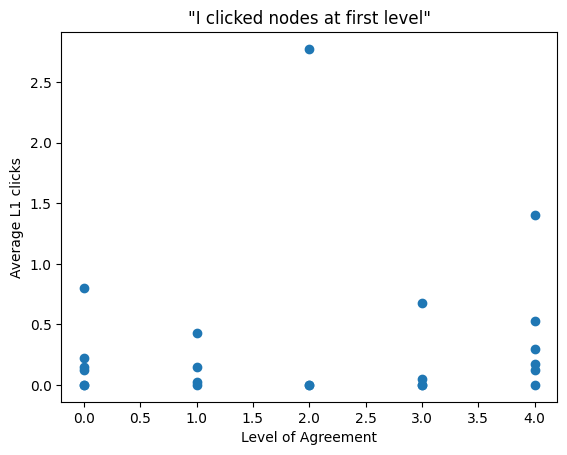

In [259]:
print(strategy_ans_df["Q0"].corr(strategy_ans_df["cL1_mean"]))
plt.scatter(strategy_ans_df["Q0"], strategy_ans_df["cL1_mean"])
plt.title("\"I clicked nodes at first level\"")
plt.xlabel("Level of Agreement")
plt.ylabel("Average L1 clicks")
plt.show()

In [113]:
strategy_ans_df["Q4"].value_counts().sort_index()

Q4
0.0    5
1.0    4
2.0    3
4.0    2
Name: count, dtype: int64

In [156]:
strategy_ans_df.where(strategy_ans_df > 2, 100)

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,3.0,100.0,100.0,100.0,3.0,100.00
1,3.0,100.0,3.0,100.0,3.0,100.00
2,100.0,100.0,3.0,100.0,100.0,100.00
3,4.0,100.0,4.0,4.0,100.0,100.00
4,3.0,100.0,100.0,3.0,100.0,100.00
5,3.0,100.0,100.0,3.0,100.0,100.00
6,100.0,100.0,100.0,100.0,100.0,100.00
8,4.0,100.0,3.0,100.0,3.0,100.00
9,100.0,3.0,100.0,4.0,4.0,100.00
10,100.0,100.0,100.0,3.0,100.0,100.00


In [165]:
agreement_df == 2

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
8,False,True,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False


In [172]:
agreement_df = strategy_ans_df.copy()
agreement_df = agreement_df.where(agreement_df >= 2, -1)
agreement_df = agreement_df.where(agreement_df <= 2, 1)
agreement_df = agreement_df.where(agreement_df != 2, 0)
agreement_df["cL1_mean"] = strategy_ans_df["cL1_mean"]

agreement_df

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,1.0,-1.0,-1.0,-1.0,1.0,0.12
1,1.0,-1.0,1.0,-1.0,1.0,0.36
2,-1.0,-1.0,1.0,-1.0,0.0,0.04
3,1.0,-1.0,1.0,1.0,-1.0,1.96
4,1.0,-1.0,-1.0,1.0,-1.0,0.00
5,1.0,-1.0,-1.0,1.0,0.0,0.60
6,-1.0,-1.0,-1.0,-1.0,-1.0,0.00
8,1.0,0.0,1.0,-1.0,1.0,0.00
9,-1.0,1.0,-1.0,1.0,1.0,0.28
10,-1.0,-1.0,-1.0,1.0,-1.0,0.00


In [176]:
(agreement_df["Q1"] + agreement_df["Q2"]).value_counts()

 0.0    13
-2.0    10
-1.0     4
 1.0     2
Name: count, dtype: int64

In [85]:
correct_answers = {
    "Q0": "$-2 to $2",
    "Q1": "$-16 to $16",
    "Q2": "$-88 to $88"
}

num_correct = {}
questions_correct = {}
bonus = {}

for cond in conditions.keys():
    num_correct[cond] = []
    questions_correct[cond] = {
        "Q0": 0,
        "Q1": 0,
        "Q2": 0
    }
    bonus[cond] = []
    sub_df = complete_data.loc[complete_data.condition == cond]
    for idx, row in sub_df.iterrows():
        part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
        part_answers = part['final_quiz_responses']
        part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
        num_correct[cond].append(part_correct_answers)
        for q in correct_answers.keys():
            questions_correct[cond][q] += int(part_answers[q] == correct_answers[q])
        part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
        bonus[cond].append(part_bonus)



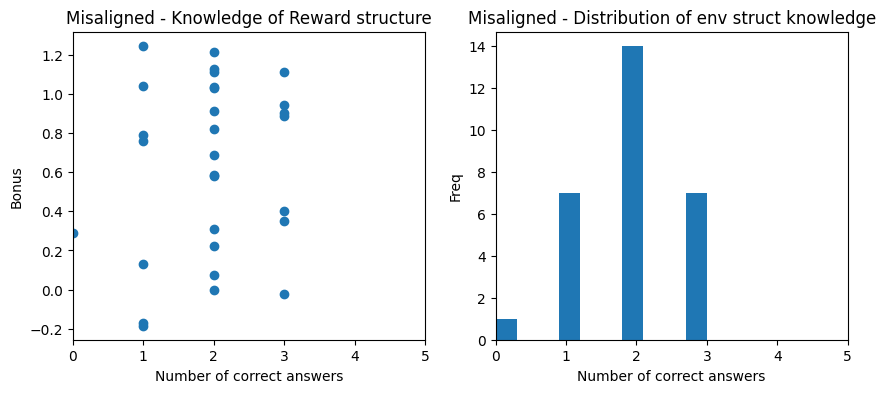

In [86]:


for idx, (cond, condname) in enumerate(conditions.items()):
    plt.figure(figsize=(5 * 2,4 * len(conditions)))
    plt.subplot(1,2,1)
    plt.scatter(num_correct[cond], bonus[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Bonus")
    plt.title(f"{condname} - Knowledge of Reward structure")
    plt.xlim([0,5])
    plt.subplot(1,2,2)
    plt.hist(num_correct[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Freq")
    plt.xlim([0,5])
    plt.title(f"{condname} - Distribution of env struct knowledge")

plt.show()

In [87]:
questions_correct

{0: {'Q0': 20, 'Q1': 13, 'Q2': 23}}